# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud

In [4]:
PATH = '../data/processed/disagreement_detection/aggregated_ds_llm.csv'

In [5]:
data = pd.read_csv(PATH)
data.head()

,paper_id,review_pair,disagreement_score,disagreement_details
0,iclr_2022_jaLDP8Hp_gc,"['0', '1']",0.7,{'Methodology': ['Review 2 suggests enhancemen...
1,iclr_2022_jaLDP8Hp_gc,"['0', '2']",0.6,"{'Methodology': [], 'Experiments': [], 'Clarit..."
2,iclr_2022_jaLDP8Hp_gc,"['0', '3']",0.7,"{'Methodology': [""Review 2 criticizes the meth..."
3,iclr_2022_jaLDP8Hp_gc,"['0', '4']",0.8,{'Methodology': ['Review 2 states limited tech...
4,iclr_2022_jaLDP8Hp_gc,"['0', '5']",0.7,{'Methodology': ['Review 2 mentions the introd...


In [6]:
len(data)

2457

In [7]:
data['paper_id'].nunique()

200

# Disagreement Score

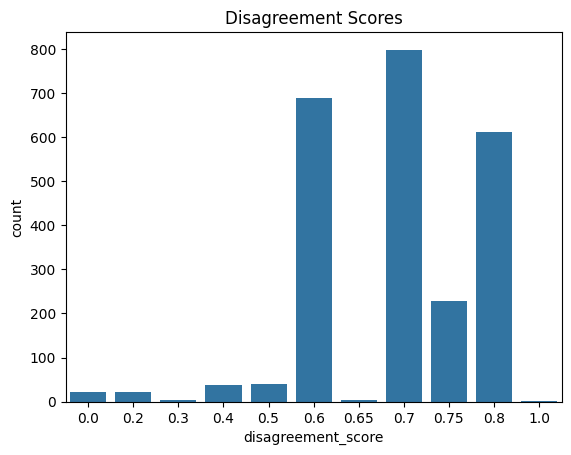

In [8]:
sns.countplot(x=round(data['disagreement_score'], 2))
plt.title('Disagreement Scores')
plt.show()

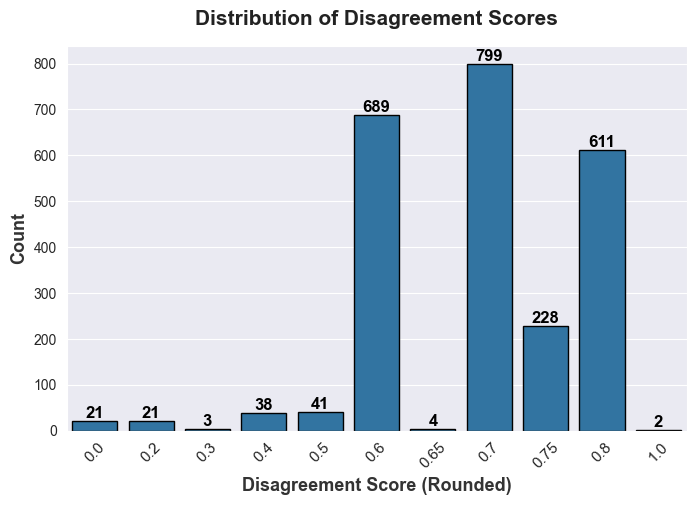

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

# Define custom color
custom_color = "#1f77b4"  # Soft blue

# Create countplot
ax = sns.countplot(x=round(data['disagreement_score'], 2), color=custom_color, edgecolor="black")

# Rotate x-ticks for better readability
plt.xticks(rotation=45, fontsize=11)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Labels & title styling
plt.xlabel("Disagreement Score (Rounded)", fontsize=13, fontweight="bold", color="#333333")
plt.ylabel("Count", fontsize=13, fontweight="bold", color="#333333")
plt.title("Distribution of Disagreement Scores", fontsize=15, fontweight="bold", color="#222222", pad=15)

# Show the figure
plt.show()

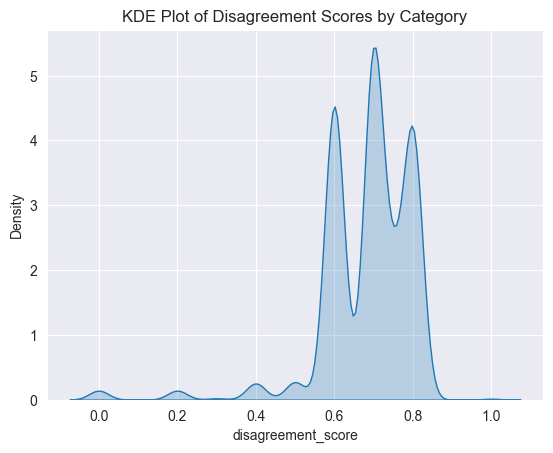

In [ ]:
sns.kdeplot(data=data, x="disagreement_score", fill=True)
plt.title("KDE Plot of Disagreement Scores by Count")
plt.show()

In [20]:
# The higher disagreement scores between the reviewers will cause difficulty for meta reviewers to make a final decision on acceptance or rejection.

# Word Cloud, Heatmap and Common Words

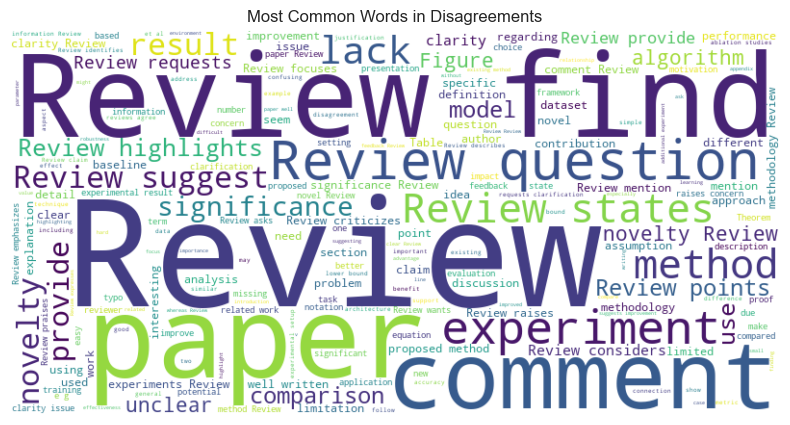

In [10]:
data['disagreement_details'] = data['disagreement_details'].apply(ast.literal_eval)

# Extract text
all_text = ' '.join([' '.join(v) for d in data['disagreement_details'] for v in d.values()])

# Generate word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(all_text)

# Plot
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Disagreements")
plt.show()

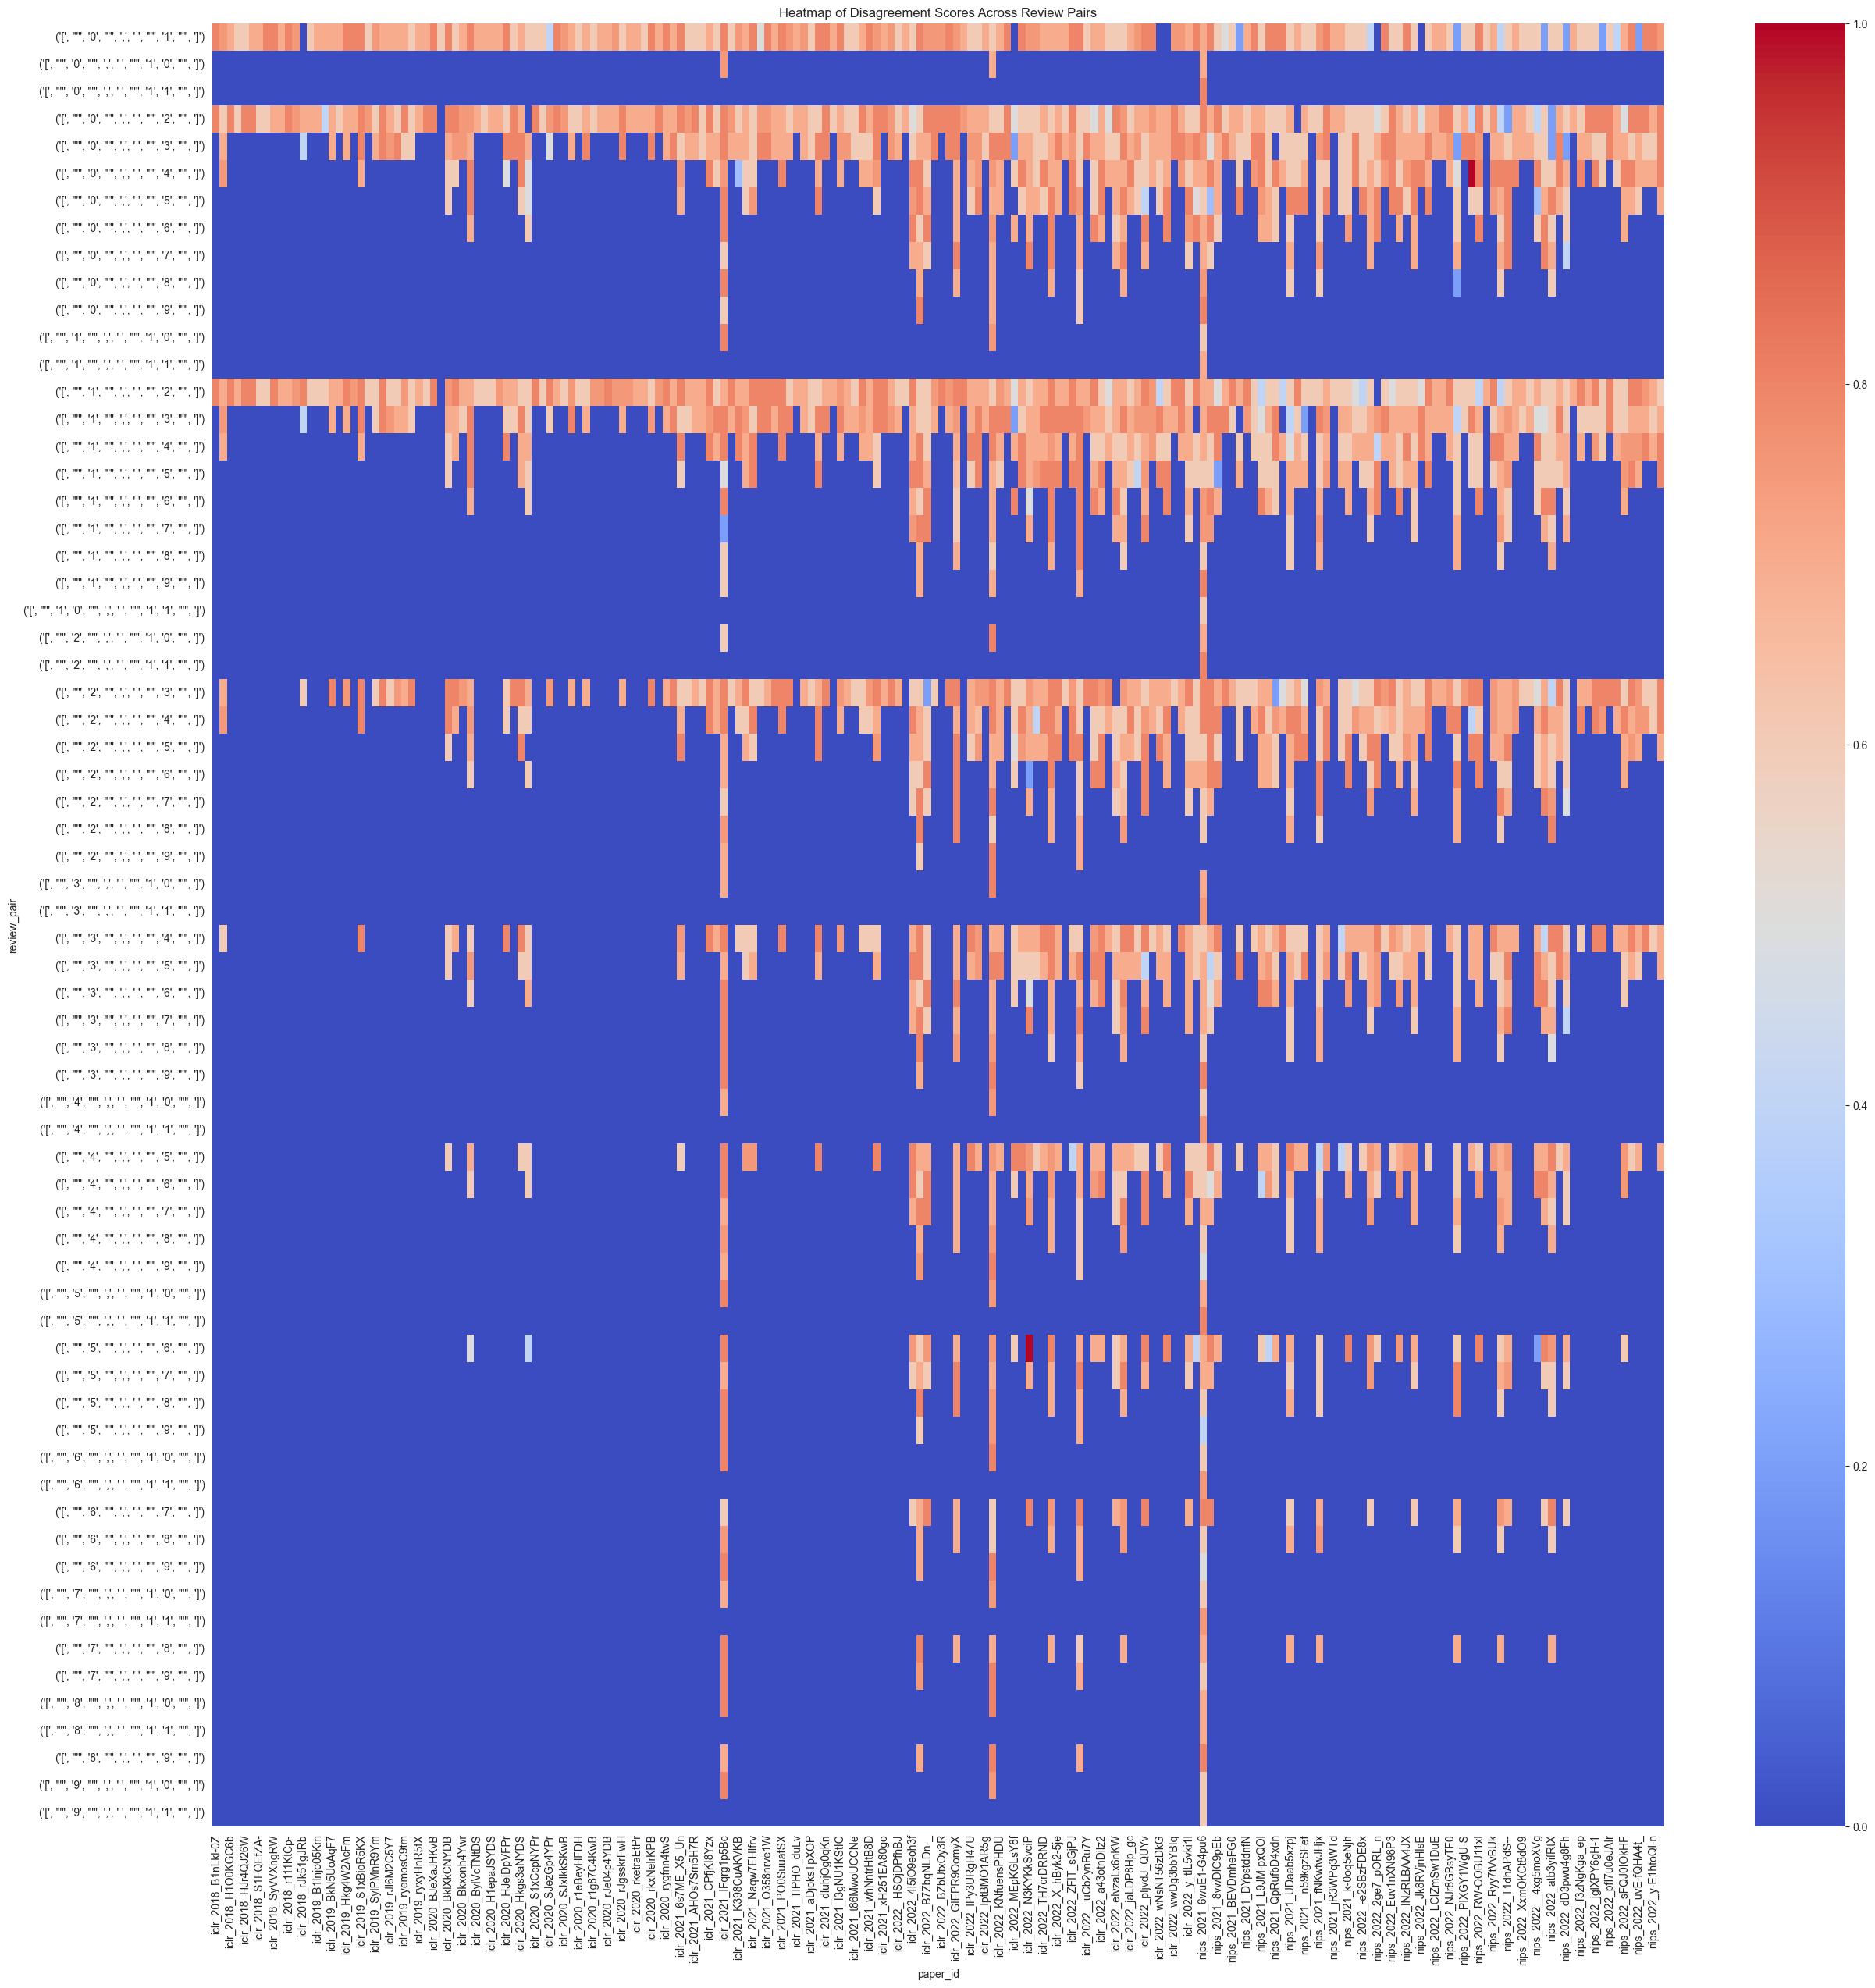

In [11]:
import seaborn as sns
import numpy as np

data['review_pair'] = data['review_pair'].apply(lambda x: tuple(x))

pivot_table = data.pivot_table(index='review_pair', columns='paper_id', values='disagreement_score', fill_value=0)

plt.figure(figsize=(30, 30))
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title("Heatmap of Disagreement Scores Across Review Pairs")
plt.show()

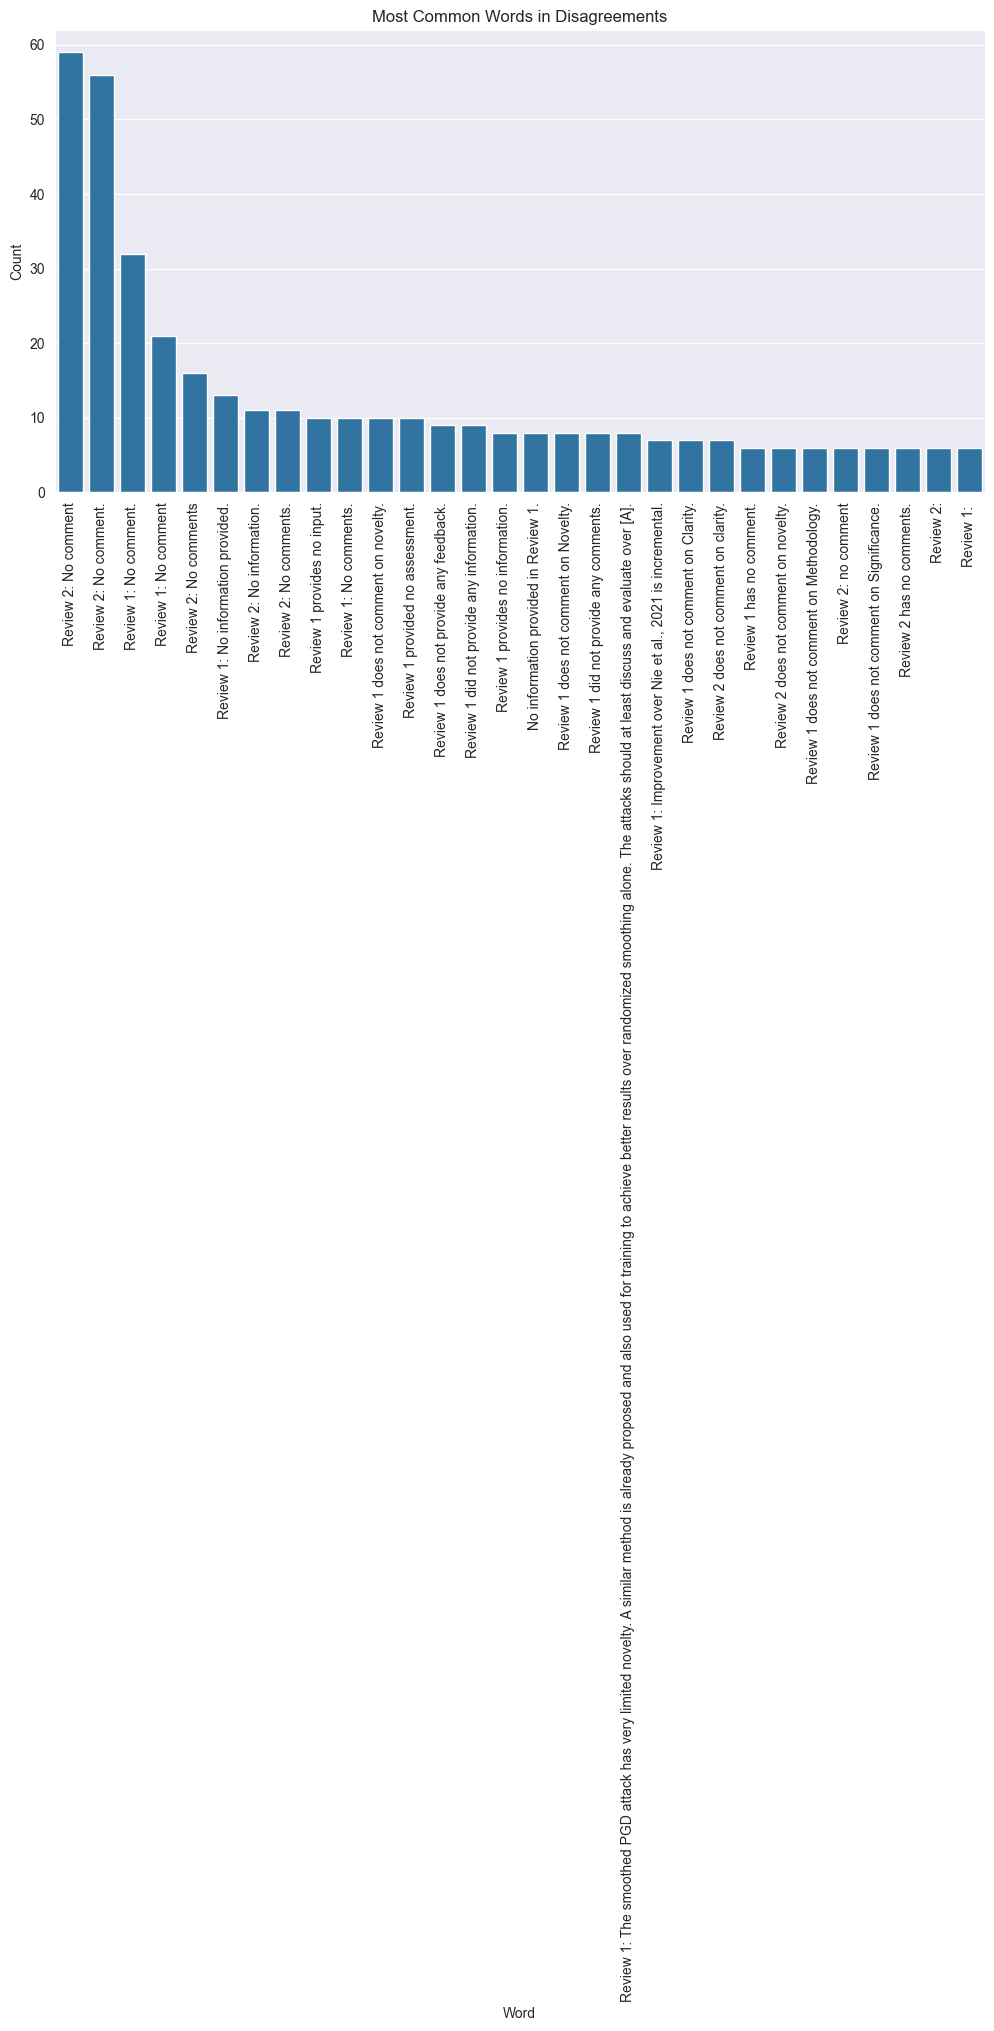

In [12]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = [word for row in data['disagreement_details'] for v in row.values() for word in v]
word_counts = Counter(all_words)

word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=word_df['Word'][:30], y=word_df['Count'][:30])
plt.xticks(rotation=90)
plt.title("Most Common Words in Disagreements")
plt.show()

# Trend Analysis : NeurIPs and ICLR Disagreement Scores

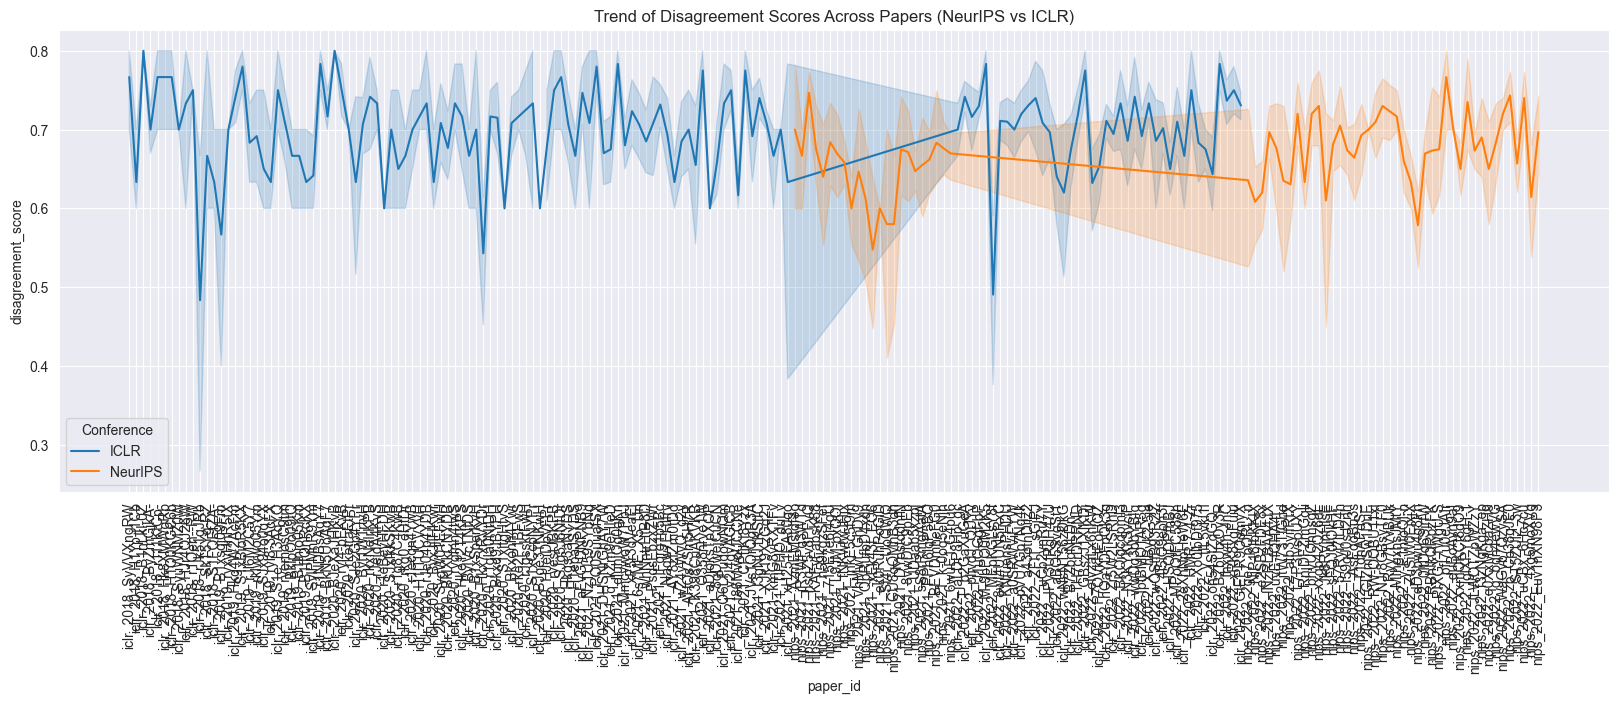

In [13]:
data['year'] = data['paper_id'].str.extract(r'(\d{4})').astype(int)
data['conference'] = data['paper_id'].apply(lambda x: 'NeurIPS' if 'nips' in x else 'ICLR')  

data_sorted = data.sort_values(by=['year', 'conference'], ascending=[True, True])

# Plot
plt.figure(figsize=(20, 6))
sns.lineplot(x=data_sorted['paper_id'], y=data_sorted['disagreement_score'], hue=data_sorted['conference'])

plt.xticks(rotation=90)
plt.title("Trend of Disagreement Scores Across Papers (NeurIPS vs ICLR)")
plt.legend(title="Conference")
plt.show()

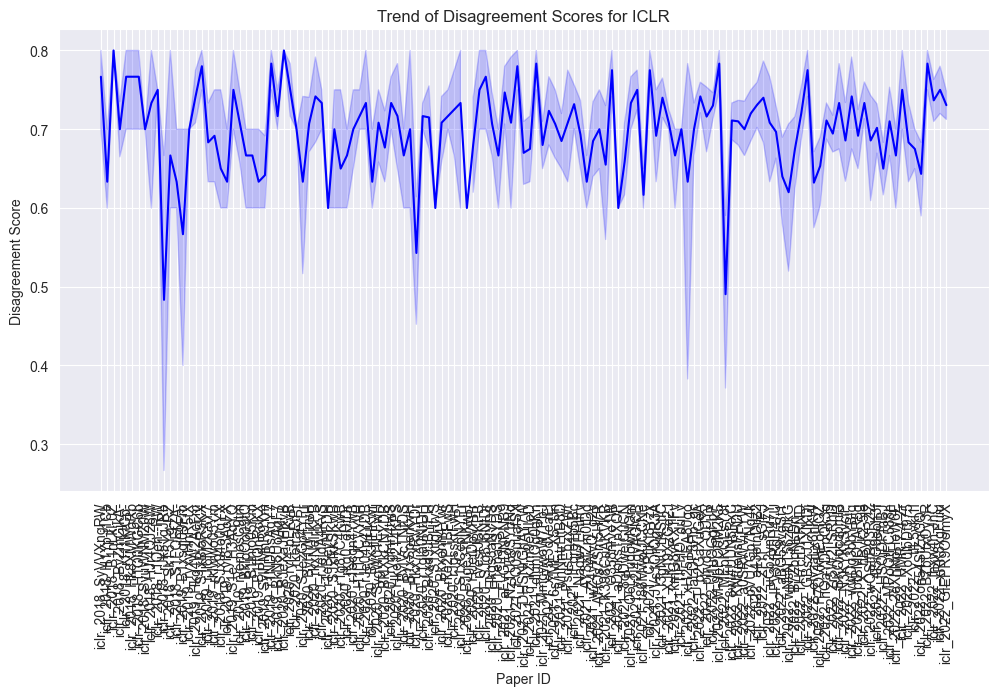

In [14]:
iclr_data = data_sorted[data_sorted['conference'] == 'ICLR']

plt.figure(figsize=(12, 6))
sns.lineplot(x=iclr_data['paper_id'], y=iclr_data['disagreement_score'], color='blue')

plt.xticks(rotation=90)
plt.title("Trend of Disagreement Scores for ICLR")
plt.xlabel("Paper ID")
plt.ylabel("Disagreement Score")
plt.show()

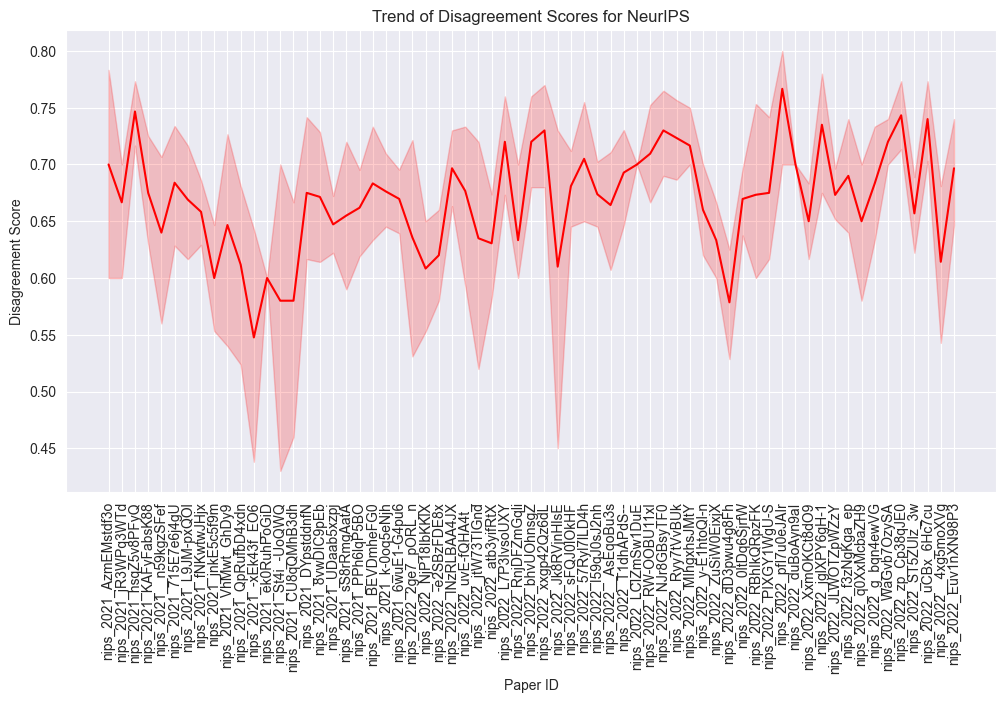

In [15]:
nips_data = data_sorted[data_sorted['conference'] == 'NeurIPS']

plt.figure(figsize=(12, 6))
sns.lineplot(x=nips_data['paper_id'], y=nips_data['disagreement_score'], color='red')

plt.xticks(rotation=90)
plt.title("Trend of Disagreement Scores for NeurIPS")
plt.xlabel("Paper ID")
plt.ylabel("Disagreement Score")
plt.show()

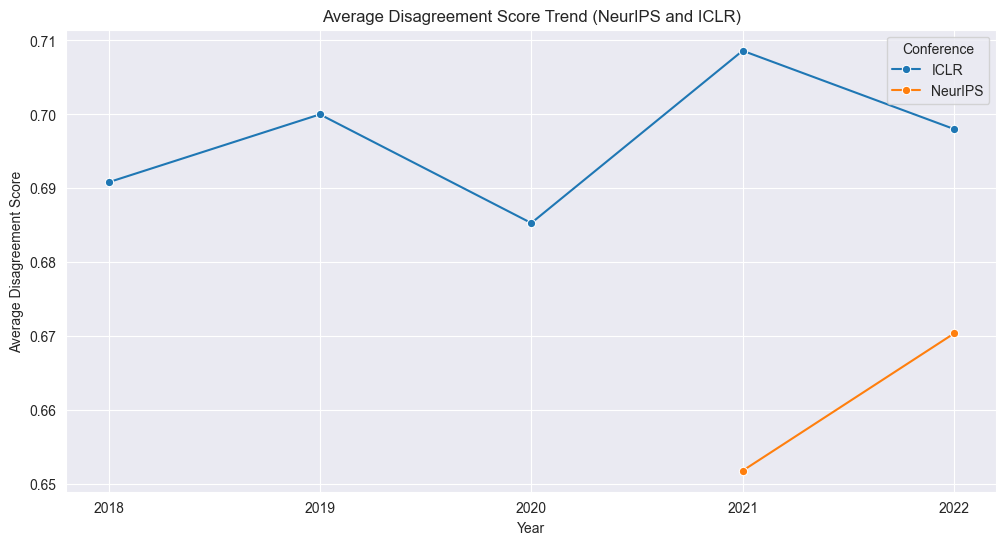

In [16]:
data['year'] = data['paper_id'].str.extract(r'(\d{4})').astype(int)
data['conference'] = data['paper_id'].apply(lambda x: 'NeurIPS' if 'nips' in x else 'ICLR')

data_grouped = data.groupby(['year', 'conference'])['disagreement_score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=data_grouped['year'], y=data_grouped['disagreement_score'], hue=data_grouped['conference'], marker="o")

plt.title("Average Disagreement Score Trend (NeurIPS and ICLR)")
plt.xlabel("Year")
plt.ylabel("Average Disagreement Score")
plt.xticks(sorted(data_grouped['year'].unique()))
plt.legend(title="Conference")  
plt.grid(True)

plt.show()

In [ ]:
# NeurIPS have slightly lower disagreement scores compared to ICLR.

# Analysis

### 1. Disagreement Scores (KDE Plot)
The higher disagreement scores between the reviewers will cause difficulty for meta reviewers to make a final decision of the summary of improvements needed.

### 2. WordCloud Section Plots
No clear pattern was seen.

### 3. Trend Analysis
No clear trend in disagreement scores is seen. But disagreement scores are always higher (>0.55)